In [1]:
#importing all the necessary libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import plotly.express as px

In [2]:
#read the dataset
lending_read = pd.read_csv("loan.csv")

C:\Users\hareesh.vedanabhatla\AppData\Local\Temp\ipykernel_15420\4040363876.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  lending_read = pd.read_csv("loan.csv")


In [3]:
#Checking the metadata like shape,size,fields etc
lending_read.shape

(39717, 111)

In [4]:
lending_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
info_df = pd.DataFrame(lending_read.dtypes, columns=['Data Type'])
info_df['Null Values'] = lending_read.isnull().sum()
info_df['Unique Values'] = lending_read.nunique()
print(info_df)

                               Data Type  Null Values  Unique Values
id                                 int64            0          39717
member_id                          int64            0          39717
loan_amnt                          int64            0            885
funded_amnt                        int64            0           1041
funded_amnt_inv                  float64            0           8205
term                              object            0              2
int_rate                          object            0            371
installment                      float64            0          15383
grade                             object            0              7
sub_grade                         object            0             35
emp_title                         object         2459          28820
emp_length                        object         1075             11
home_ownership                    object            0              5
annual_inc                       f

In [6]:
lending_read.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
lending_read.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [9]:
lending_read.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [10]:
#Checking the missing values. Tried the standard method lending_read.isnull().sum() but does not display teh whole 111 fields. So exported to a csv to view
null_counts = lending_read.isnull().sum()
null_counts.to_csv('null_counts.csv')


In [11]:
# Observations
# loan_status field is what we can consider as the independent variable which indicates loan default
# 58 columns out of 111 have majority (>60%) null values and hence dropping those entire columns altogether

# pymnt_plan, applicant_type,initial_list_status, policy_code, tax_liens,verification_status_joint have single value, hence dropping them because analysis cannot be done.

# url, desc, zip code,collection_recovery_fee,emp_title, collections_12_mths_ex_med, last_pymnt_d,last_credit_pull_d,pub_rec,funded_amnt,funded_amnt_inv,installment,issue_d
#,earliest_cr_line,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt

# Above mentioned fields are not useful for analysis because they are either just attributes or do not influence/qualify the quality (risky/non risky) of the borrower and hence dropping them
# only one among id and Member_id can be retained so removing id
# recoveries is an amount AFTER the loan has been charged off and hence has no bearing on the loan default. Hence dropping this field also
#"title" field is just like "purpose" field but in borrowers' words, sometimes verbose. We should be better using "Purpose" which looks much more standardised. Hence dropping "title"



# Dropping all the above mentioned columns in round 1. 
# List of columns to drop
columns_to_drop = [
    'acc_open_past_24mths', 'all_util', 'annual_inc_joint', 'application_type', 'avg_cur_bal', 
    'bc_open_to_buy', 'bc_util', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'desc', 
    'dti_joint', 'emp_title', 'il_util', 'initial_list_status', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 
    'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 
    'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 
    'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 
    'next_pymnt_d', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 
    'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 
    'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open_acc_6m', 'open_il_12m', 'open_il_24m', 
    'open_il_6m', 'open_rv_12m', 'open_rv_24m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'policy_code', 'pymnt_plan', 
    'recoveries', 'tax_liens', 'tot_coll_amt', 'tot_cur_bal', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bal_il', 
    'total_bc_limit', 'total_cu_tl', 'total_il_high_credit_limit', 'total_rev_hi_lim', 'url', 'verified_status_joint', 
    'zip_code', 'verification_status_joint', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'last_pymnt_d', 
    'title', 'last_credit_pull_d', 'pub_rec', 'id', 'funded_amnt', 'funded_amnt_inv', 'installment', 'issue_d', 
    'earliest_cr_line', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 
    'last_pymnt_amnt'
]

# Drop the specified columns
lending_read = lending_read.drop(columns=columns_to_drop, errors='ignore')
lending_read.to_csv('cleaned_lending_round1.csv', index=False)





In [12]:
# Doing all basic checks again
lending_read.shape

(39717, 23)

In [13]:
# since lending_read.info not giving output in legible format, used the following code from stackoverflow

info_df = pd.DataFrame(lending_read.dtypes, columns=['Data Type'])
info_df['Null Values'] = lending_read.isnull().sum()
info_df['Unique Values'] = lending_read.nunique()
print(info_df)

                     Data Type  Null Values  Unique Values
member_id                int64            0          39717
loan_amnt                int64            0            885
term                    object            0              2
int_rate                object            0            371
grade                   object            0              7
sub_grade               object            0             35
emp_length              object         1075             11
home_ownership          object            0              5
annual_inc             float64            0           5318
verification_status     object            0              3
loan_status             object            0              3
purpose                 object            0             14
addr_state              object            0             50
dti                    float64            0           2868
delinq_2yrs              int64            0             11
inq_last_6mths           int64            0             

In [14]:
# checking for duplicate records
duplicate_rows = lending_read[lending_read.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [member_id, loan_amnt, term, int_rate, grade, sub_grade, emp_length, home_ownership, annual_inc, verification_status, loan_status, purpose, addr_state, dti, delinq_2yrs, inq_last_6mths, open_acc, revol_bal, revol_util, total_acc, out_prncp, out_prncp_inv, pub_rec_bankruptcies]
Index: []


In [15]:
#There are no duplicate records
#emp_length has 1075 missing values
#revol_util has 50 missing values
#pub_rec_bankruptcies has 697 mssing values
# going into detail of value counts of all 3, and by the data, we can find out if/how to impute/drop the missing values
lending_read.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
member_id,39717.0,850463.559408,265678.307421,70699.0,666780.00,850812.0,1047339.0,1314167.00
loan_amnt,39717.0,11219.443815,7456.670694,500.0,5500.00,10000.0,15000.0,35000.00
annual_inc,39717.0,68968.926377,63793.765790,4000.0,40404.00,59000.0,82300.0,6000000.00
dti,39717.0,13.315130,6.678594,0.0,8.17,13.4,18.6,29.99
delinq_2yrs,39717.0,0.146512,0.491812,0.0,0.00,0.0,0.0,11.00
inq_last_6mths,39717.0,0.869200,1.070219,0.0,0.00,1.0,1.0,8.00
open_acc,39717.0,9.294408,4.400282,2.0,6.00,9.0,12.0,44.00
revol_bal,39717.0,13382.528086,15885.016641,0.0,3703.00,8850.0,17058.0,149588.00
total_acc,39717.0,22.088828,11.401709,2.0,13.00,20.0,29.0,90.00
out_prncp,39717.0,51.227887,375.172839,0.0,0.00,0.0,0.0,6311.47


In [16]:
lending_read['emp_length'].value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [17]:
lending_read['revol_util'].value_counts()

revol_util
0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
0.10%      58
31.20%     57
61%        57
46.40%     57
66.60%     57
65.90%     56
70.40%     56
57.40%     55
49.80%     55
48.90%     55
25.50%     55
37.60%     55
64.80%     55
27.20%     54
89.50%     54
35.30%     54
46.60%     54
51.10%     54
32%        54
76.60%     54
68.60%     54
78.70%     54
75.50%     54
64.60%     54
51.60%     54
72.10%     53
62.80%     53
54.30%     53
45.60%     53
55.80%     53
48.20%     53
47.80%     53
68.70%     53
33.70%     53
70.80%     53
34.40%     53
41%        53
70.10%     52
66.90%     52
55.10%     52
53.90%     52
51.50%     52
48%        52
41.60%     52
29.10%     52
70.30%     52
55.50%     52
74.90%     52
36.50%     52
40.20%     51
58.70%     51
41.40%     51
49.10%     51
89.90%     51
43.40%     51
30.90%     51
54.10%     51
35.70%     51
45.90%     51
88%        51
66.10%     51
49.60%     51
54.60%     51
57.90%     50
52.30%     50
19.80%   

In [18]:
lending_read['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

In [19]:
#We should also check the Dependent variable loan_status
lending_read['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [20]:
# As we are analysing drivers behind defaults, "Current" loan_status is not relevant as the result of that loan is not conclusive. We will retain "Fully paid" and "Charged off" ones for now and proceed further
lending_read = lending_read[lending_read['loan_status'] != 'Current']



In [21]:
# Checking missing values again
info_df = pd.DataFrame(lending_read.dtypes, columns=['Data Type'])
info_df['Null Values'] = lending_read.isnull().sum()
info_df['Unique Values'] = lending_read.nunique()
print(info_df)

                     Data Type  Null Values  Unique Values
member_id                int64            0          38577
loan_amnt                int64            0            870
term                    object            0              2
int_rate                object            0            370
grade                   object            0              7
sub_grade               object            0             35
emp_length              object         1033             11
home_ownership          object            0              5
annual_inc             float64            0           5215
verification_status     object            0              3
loan_status             object            0              2
purpose                 object            0             14
addr_state              object            0             50
dti                    float64            0           2853
delinq_2yrs              int64            0             11
inq_last_6mths           int64            0             

In [22]:
#Updated missing values
#emp_length has 1033 missing values
#revol_util has 50 missing values
#pub_rec_bankruptcies has 697 mssing values. Addressing them one by one

# missing values in pub_rec_bankruptcies can be imputed with 0 which is the mode. I chose mode despite numeric/continuous variable because it makes business sense to not assign any bankruptcies when none is available in data.
lending_read['pub_rec_bankruptcies'] = lending_read['pub_rec_bankruptcies'].fillna(0)


In [23]:
# missing values in revol_util can be imputed with mean. Data type conversion and cleanup of % symbol should preceed that

lending_read['revol_util'] = lending_read['revol_util'].str.replace('%', '').astype(float)
lending_read['revol_util'] = lending_read['revol_util'].fillna(lending_read['revol_util'].mean())


In [24]:
# missing values in emp_length can be imputed with mode since it is categorical variable.
lending_read['emp_length'] = lending_read['emp_length'].fillna(lending_read['emp_length'].mode()[0])

In [25]:
lending_read['emp_length'].value_counts()

emp_length
10+ years    9521
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [26]:
#Recheck if all missing values are addressed
info_df = pd.DataFrame(lending_read.dtypes, columns=['Data Type'])
info_df['Null Values'] = lending_read.isnull().sum()
info_df['Unique Values'] = lending_read.nunique()
print(info_df)

                     Data Type  Null Values  Unique Values
member_id                int64            0          38577
loan_amnt                int64            0            870
term                    object            0              2
int_rate                object            0            370
grade                   object            0              7
sub_grade               object            0             35
emp_length              object            0             11
home_ownership          object            0              5
annual_inc             float64            0           5215
verification_status     object            0              3
loan_status             object            0              2
purpose                 object            0             14
addr_state              object            0             50
dti                    float64            0           2853
delinq_2yrs              int64            0             11
inq_last_6mths           int64            0             

In [27]:
#Converting data types and cleanup of Individual fields
# Convert all values in the 'int_rate' column to strings and then Remove '%' and convert to float
lending_read['int_rate'] = lending_read['int_rate'].astype(str)
lending_read['int_rate'] = lending_read['int_rate'].str.replace('%', '').astype(float)




In [28]:
lending_read['pub_rec_bankruptcies'] = lending_read['pub_rec_bankruptcies'].astype(int)


In [29]:
# Convert all int64 columns to int32

int64_cols = lending_read.select_dtypes(include=['int64']).columns
lending_read[int64_cols] = lending_read[int64_cols].astype('int32')

# Convert all object columns to strings
object_cols = lending_read.select_dtypes(include=['object']).columns
lending_read[object_cols] = lending_read[object_cols].astype(str)

In [30]:
lending_read.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
member_id,38577.0,842284.337429,264451.929349,70699.00,661131.00,839292.00,1037336.00,1314167.00
loan_amnt,38577.0,11047.025430,7348.441646,500.00,5300.00,9600.00,15000.00,35000.00
int_rate,38577.0,11.932219,3.691327,5.42,8.94,11.71,14.38,24.40
annual_inc,38577.0,68777.973681,64218.681802,4000.00,40000.00,58868.00,82000.00,6000000.00
dti,38577.0,13.272727,6.673044,0.00,8.13,13.37,18.56,29.99
delinq_2yrs,38577.0,0.146668,0.492271,0.00,0.00,0.00,0.00,11.00
inq_last_6mths,38577.0,0.871737,1.071546,0.00,0.00,1.00,1.00,8.00
open_acc,38577.0,9.275423,4.401588,2.00,6.00,9.00,12.00,44.00
revol_bal,38577.0,13289.489826,15866.492241,0.00,3650.00,8762.00,16912.00,149588.00
revol_util,38577.0,48.702777,28.346353,0.00,25.20,49.00,72.20,99.90


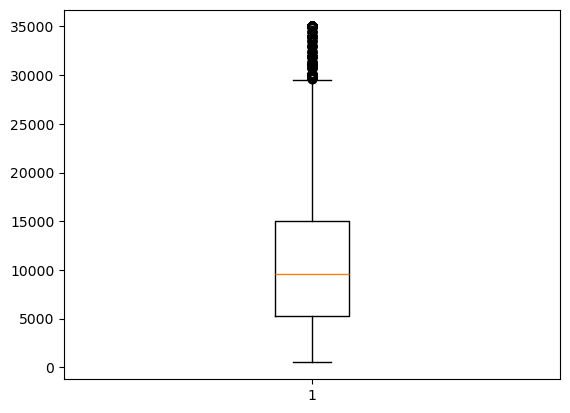

In [31]:
# Outlier analysis for numeric/continuous fields (to check if any junk or unwanted data has to be cleaned up). This also acts as univariate analysis for numeric variables
plt.boxplot(lending_read.loan_amnt)
plt.show()

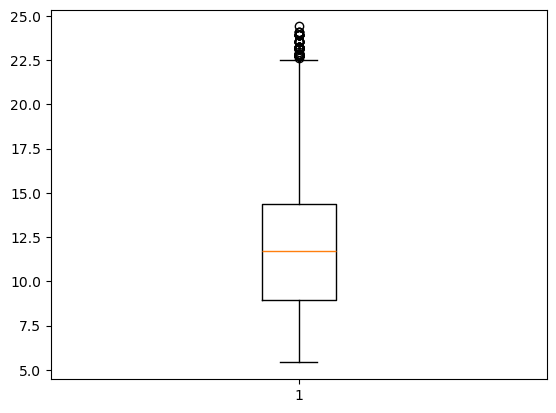

In [32]:
plt.boxplot(lending_read.int_rate)
plt.show()

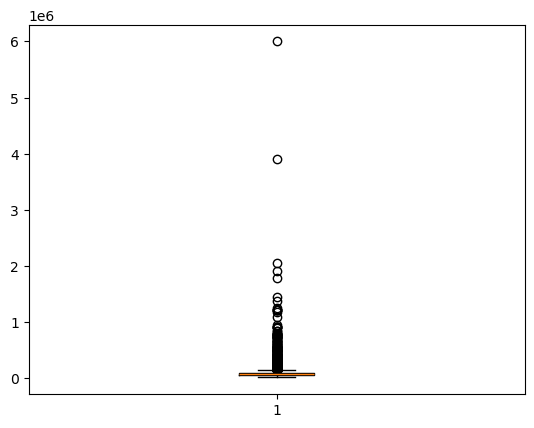

In [33]:
plt.boxplot(lending_read.annual_inc)
plt.show()

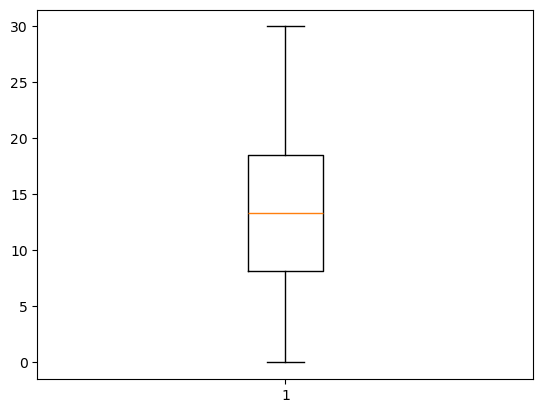

In [34]:
plt.boxplot(lending_read.dti)
plt.show()

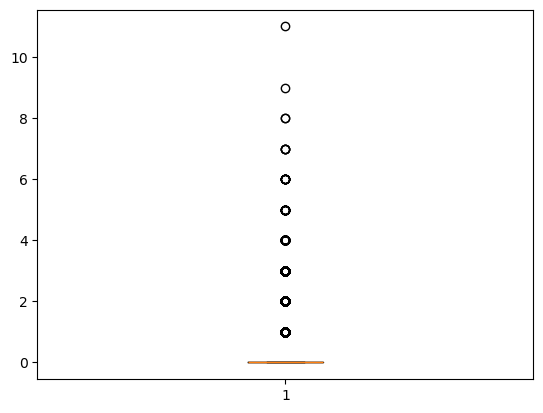

In [35]:
plt.boxplot(lending_read.delinq_2yrs)
plt.show()

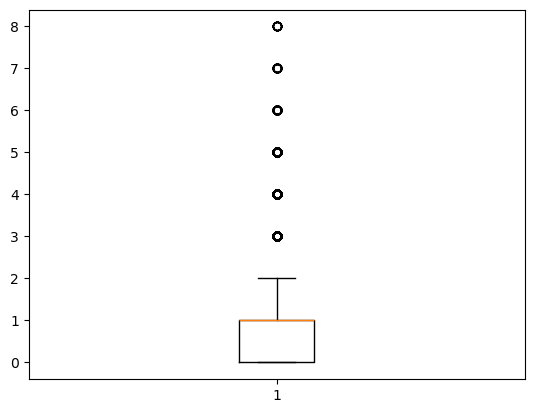

In [36]:
plt.boxplot(lending_read.inq_last_6mths)
plt.show()

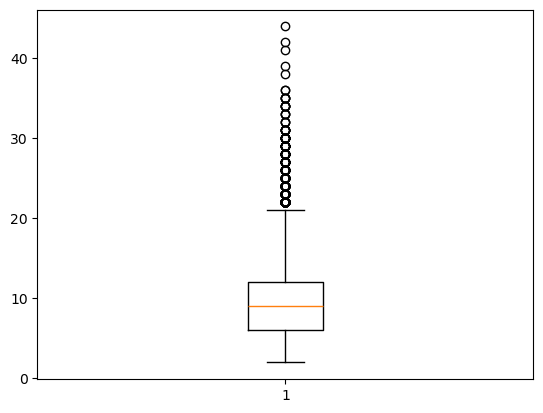

In [37]:
plt.boxplot(lending_read.open_acc)
plt.show()

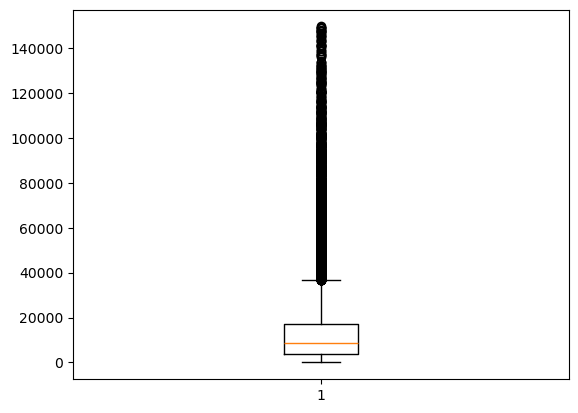

In [38]:
plt.boxplot(lending_read.revol_bal)
plt.show()

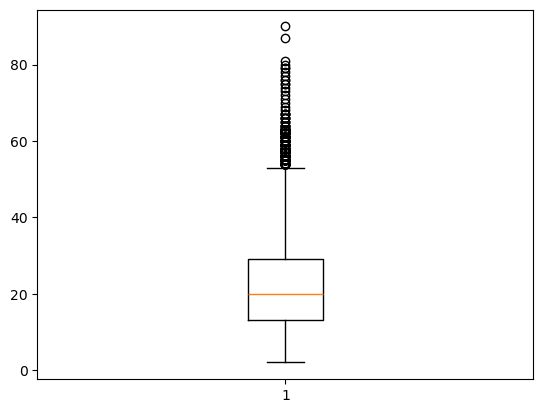

In [39]:
plt.boxplot(lending_read.total_acc)
plt.show()

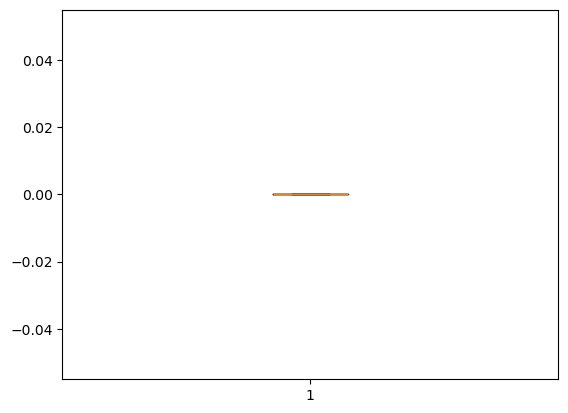

In [40]:
plt.boxplot(lending_read.out_prncp)
plt.show()

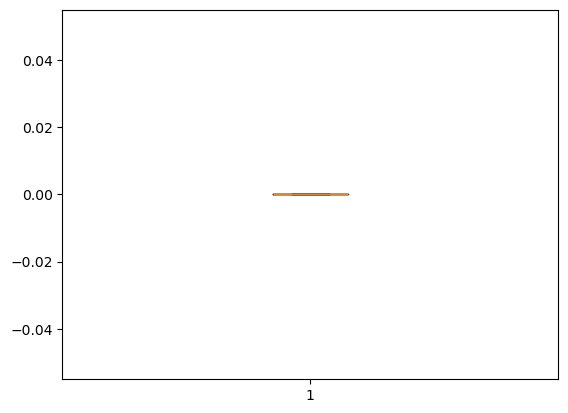

In [41]:
plt.boxplot(lending_read.out_prncp_inv)
plt.show()

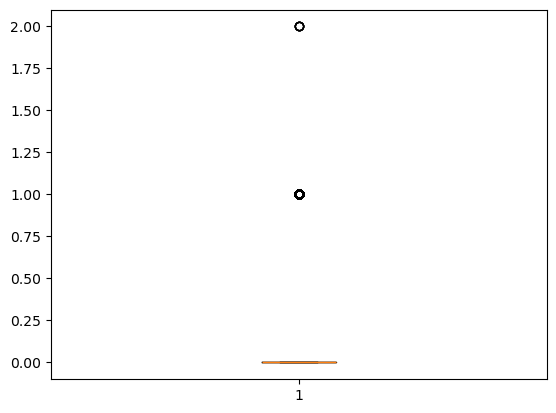

In [42]:
plt.boxplot(lending_read.pub_rec_bankruptcies)
plt.show()

In [43]:
# Upon observing all box plots, only it looks like only annual_inc needs a deeper look
lending_read.annual_inc.value_counts().sort_index()

annual_inc
4000.00          1
4080.00          1
4200.00          2
4800.00          4
4888.00          1
5000.00          1
5500.00          1
6000.00          5
7000.00          1
7200.00          4
7500.00          1
7800.00          1
7904.04          1
8000.00          7
8004.00          1
8088.00          3
8280.00          1
8400.00          4
8412.00          1
8472.00          1
8500.00          1
8628.00          2
9000.00          2
9081.00          1
9192.00          1
9240.00          1
9600.00         25
9732.00          1
9840.00          1
9900.00          1
9960.00          1
10000.00        19
10008.00         2
10080.00         1
10140.00         1
10200.00         4
10380.00         1
10400.00         1
10500.00         1
10560.00         2
10636.00         1
10668.00         1
10720.00         1
10800.00        11
10980.00         1
11000.00         5
11029.00         1
11220.00         1
11292.00         1
11340.00         2
11389.00         1
11440.00         1
1

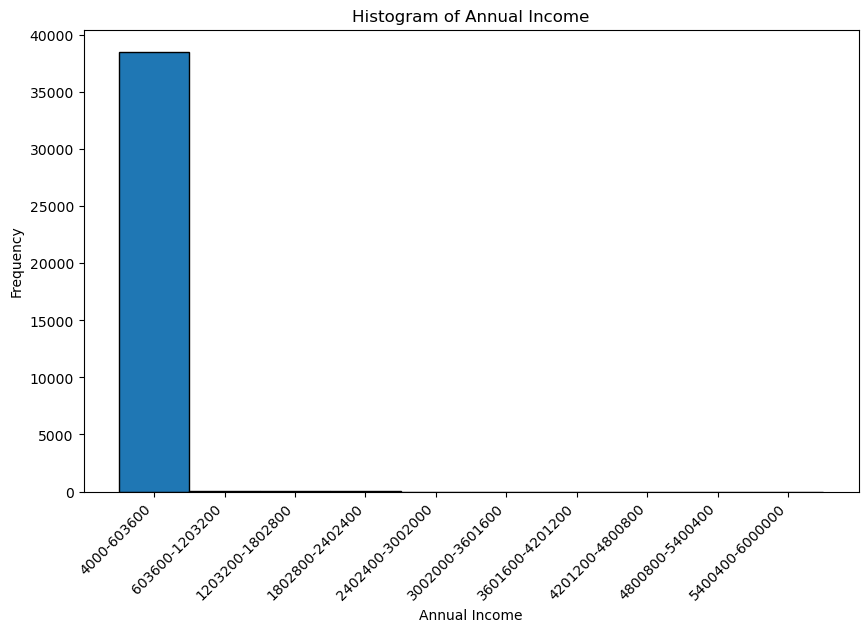

In [44]:
#plt.figure(figsize=(10, 6))
#plt.hist(lending_read['annual_inc'], bins=10, edgecolor='k') 
#plt.xlabel('Annual Income')
#plt.ylabel('Frequency')
#plt.title('Histogram of Annual Income')
#plt.show()

plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(lending_read['annual_inc'], bins=10, edgecolor='k')

# Labeling the bins
bin_labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]
bin_midpoints = 0.5 * (bins[:-1] + bins[1:])
plt.xticks(bin_midpoints, bin_labels, rotation=45, ha='right')

plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Histogram of Annual Income')
plt.show()

In [45]:
# Though there are many outliers outside the IQR, the only significant records worth eliminating are for annual income >= $3 Million. So dropping those 2 records
lending_read = lending_read[lending_read['annual_inc'] <= 3000000]


In [46]:
# Renaming the column names to remove abbreviations and better readability

lending_read.columns = [
    'member_id', 'loan_amount', 'term', 'interest_rate', 'grade', 'sub_grade',
    'employment_length', 'home_ownership', 'annual_income', 'verification_status',
    'loan_status', 'purpose', 'address_state', 'debt_to_income_ratio', 'delinquencies_2yrs',
    'inquiries_last_6_months', 'open_accounts', 'revolving_balance', 'revolving_utilization',
    'total_accounts', 'outstanding_principal', 'outstanding_principal_investor', 'public_record_bankruptcies'
]



In [47]:
# Addressing precision issues
lending_read['annual_income'] = lending_read['annual_income'].round().astype(int)
lending_read['revolving_utilization'] = lending_read['revolving_utilization'].round(1)
lending_read.to_csv('Cleaned_lending_final.csv', index=False)

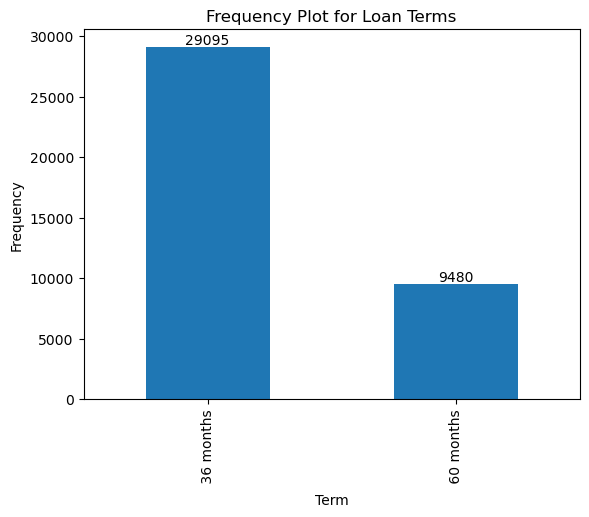

In [48]:
# Now that the data is cleaned we can start with Univariate analysis
# Starting with Categorical variables in data source order. 

#Frequency plot for term
term_counts = lending_read['term'].value_counts()
ax = term_counts.plot(kind='bar')

for i in ax.containers:
    ax.bar_label(i)

plt.title('Frequency Plot for Loan Terms')
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.show()

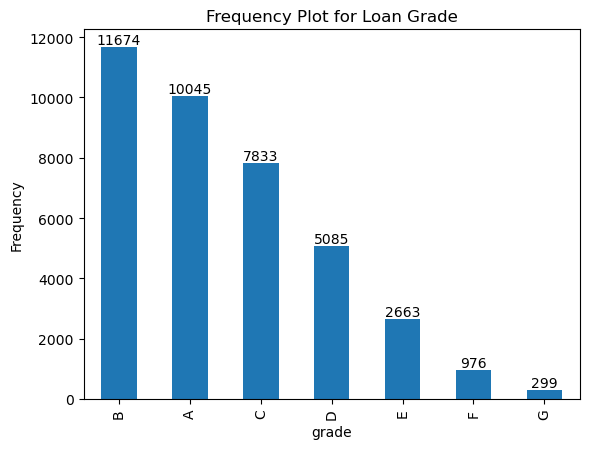

In [49]:
#Observation - 36 month loan term are more in number

#Frequency plot for grade
term_counts = lending_read['grade'].value_counts()
ax = term_counts.plot(kind='bar')

for i in ax.containers:
    ax.bar_label(i)

plt.title('Frequency Plot for Loan Grade')

plt.xlabel('grade')
plt.ylabel('Frequency')
plt.show()

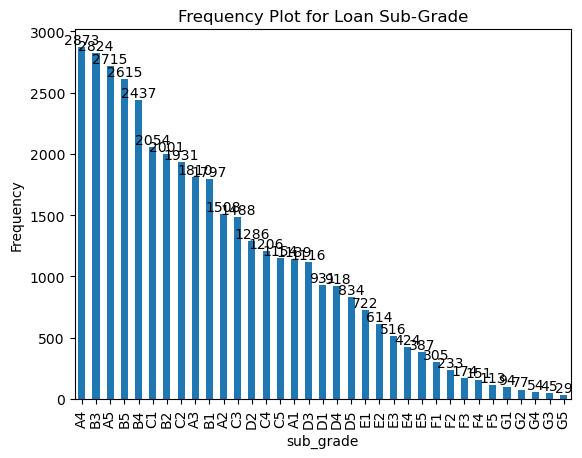

In [50]:
#Frequency plot for sub grade
term_counts = lending_read['sub_grade'].value_counts()
ax = term_counts.plot(kind='bar')

for i in ax.containers:
    ax.bar_label(i)

plt.title('Frequency Plot for Loan Sub-Grade')
plt.xlabel('sub_grade')
plt.ylabel('Frequency')
plt.show()

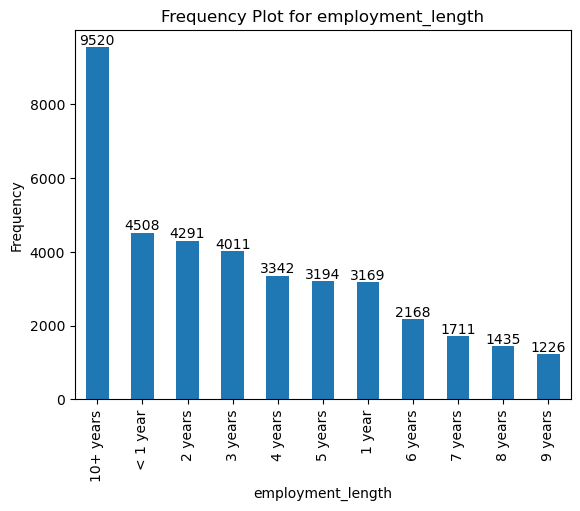

In [51]:

#Frequency plot for employment_length
term_counts = lending_read['employment_length'].value_counts()
ax = term_counts.plot(kind='bar')

for i in ax.containers:
    ax.bar_label(i)

plt.title('Frequency Plot for employment_length')
plt.xlabel('employment_length')
plt.ylabel('Frequency')
plt.show()

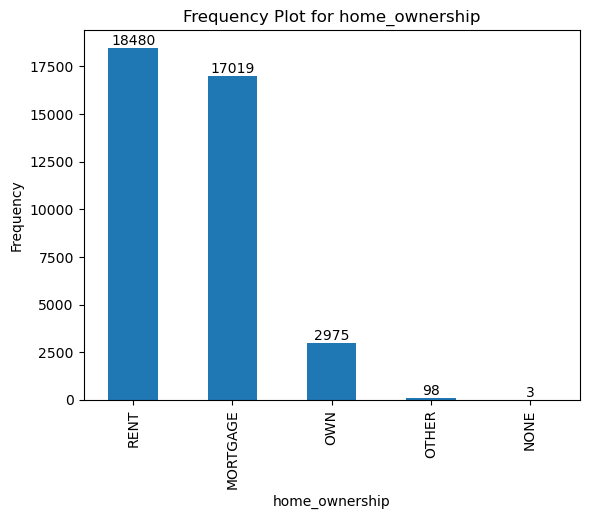

In [52]:

#Frequency plot for home_ownership
term_counts = lending_read['home_ownership'].value_counts()
ax = term_counts.plot(kind='bar')

for i in ax.containers:
    ax.bar_label(i)

plt.title('Frequency Plot for home_ownership')
plt.xlabel('home_ownership')
plt.ylabel('Frequency')
plt.show()

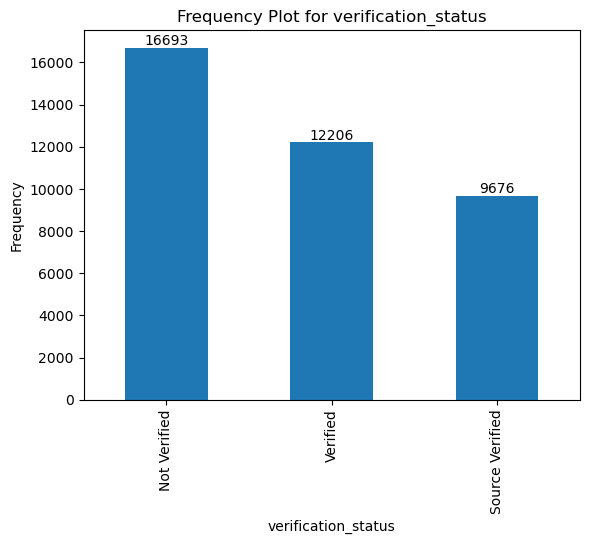

In [53]:

#Frequency plot for verification_status
term_counts = lending_read['verification_status'].value_counts()
ax = term_counts.plot(kind='bar')

for i in ax.containers:
    ax.bar_label(i)

plt.title('Frequency Plot for verification_status')
plt.xlabel('verification_status')
plt.ylabel('Frequency')
plt.show()

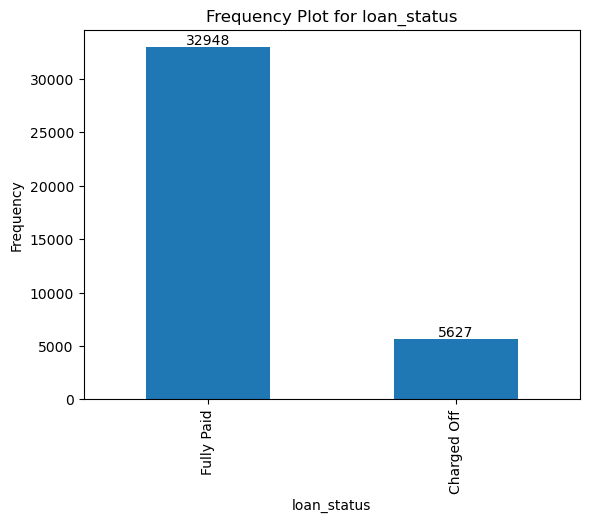

In [54]:
#Frequency plot for loan_status (this is the dependent variable so we will not consider this as an observation just checking)
term_counts = lending_read['loan_status'].value_counts()
ax = term_counts.plot(kind='bar')

for i in ax.containers:
    ax.bar_label(i)

plt.title('Frequency Plot for loan_status')
plt.xlabel('loan_status')
plt.ylabel('Frequency')
plt.show()

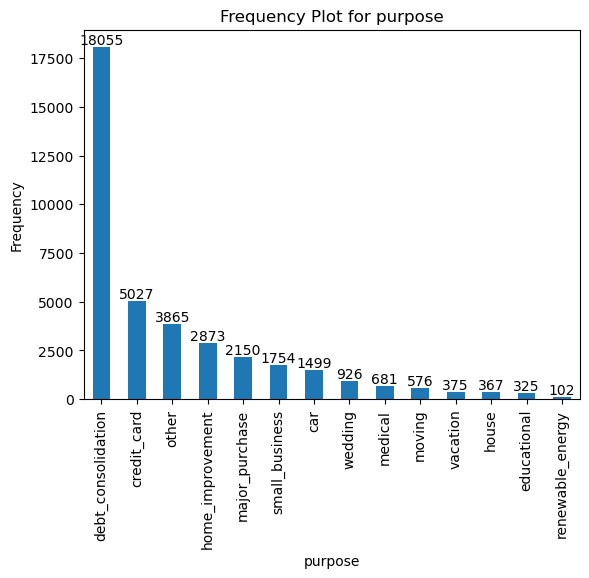

In [55]:
#Frequency plot for purpose
term_counts = lending_read['purpose'].value_counts()
ax = term_counts.plot(kind='bar')

for i in ax.containers:
    ax.bar_label(i)

plt.title('Frequency Plot for purpose')
plt.xlabel('purpose')
plt.ylabel('Frequency')
plt.show()

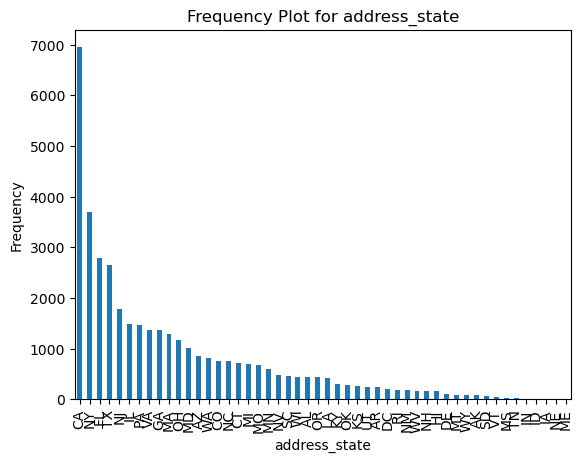

In [56]:
#Frequency plot for address_state
term_counts = lending_read['address_state'].value_counts()
ax = term_counts.plot(kind='bar')

#for i in ax.containers:
   # ax.bar_label(i)

plt.title('Frequency Plot for address_state')
plt.xlabel('address_state')
plt.ylabel('Frequency')
plt.show()

In [57]:
# Summary metrics univariate

lending_read.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
member_id,38575.0,842293.380635,264455.800739,70699.00,661113.50,839297.00,1037338.50,1314167.00
loan_amount,38575.0,11046.820480,7348.224232,500.00,5300.00,9600.00,15000.00,35000.00
interest_rate,38575.0,11.932232,3.691415,5.42,8.94,11.71,14.38,24.40
annual_income,38575.0,68524.896591,53213.429876,4000.00,40000.00,58853.00,82000.00,2039784.00
debt_to_income_ratio,38575.0,13.273410,6.672544,0.00,8.13,13.37,18.56,29.99
delinquencies_2yrs,38575.0,0.146675,0.492283,0.00,0.00,0.00,0.00,11.00
inquiries_last_6_months,38575.0,0.871679,1.071518,0.00,0.00,1.00,1.00,8.00
open_accounts,38575.0,9.275541,4.401525,2.00,6.00,9.00,12.00,44.00
revolving_balance,38575.0,13290.056902,15866.706718,0.00,3651.50,8762.00,16912.00,149588.00
revolving_utilization,38575.0,48.704049,28.346367,0.00,25.20,49.00,72.20,99.90


In [58]:
# outstanding_principal and outstanding_principal_investor can be dropped since zero values. We can ignore them in our analysis
# Univariate analysis just gave a summary of what the data looks like
# for better analysis, we must do analysis with combinations of all relevant variables with loan_status or Bivariate analyses
# We will do a lot of box plot combinations of numeric/continuous variables and segmented bar plot combinations of categorical variables with dependent variable loan_status hence to avoid repetetions iamn writing three custom functions

#Function for bar plots
def plot_boxplot(y_label):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='loan_status', y=y_label, data=lending_read)
    plt.title(f'{y_label.replace("_", " ").title()} by Loan Status')
    plt.xlabel('Loan Status')
    plt.ylabel(y_label.replace("_", " ").title())
    plt.show()
    
#Function for count plots
def plot_countplot(x_label):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=x_label, hue='loan_status', data=lending_read)
    plt.title(f'Loan Status by {x_label.replace("_", " ").title()}')
    plt.xlabel(x_label.replace("_", " ").title())
    plt.ylabel('Count')
    plt.show()
#Function for 100% stacked bar plot (in case we want to check proportions)
def plot_stacked_bar(x_label):
    counts = lending_read.groupby([x_label, 'loan_status']).size().unstack().fillna(0)
    proportions = counts.div(counts.sum(axis=1), axis=0)
    proportions.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Loan Status by {x_label.replace("_", " ").title()} (100% Stacked)')
    plt.xlabel(x_label.replace("_", " ").title())
    plt.ylabel('Proportion')
    plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
# We will pass each variable as argument to y label to these functions as function call
# Following from hereon are plots of all independent variables with loan_status, as evident from function calls
# Some of these are customer attributes and some are loan attributes (please refer to the presentation for this classification)
# In cases where readability of Boxes are difficult due to skewness/spread of data, I have used log scale to widen the boxes

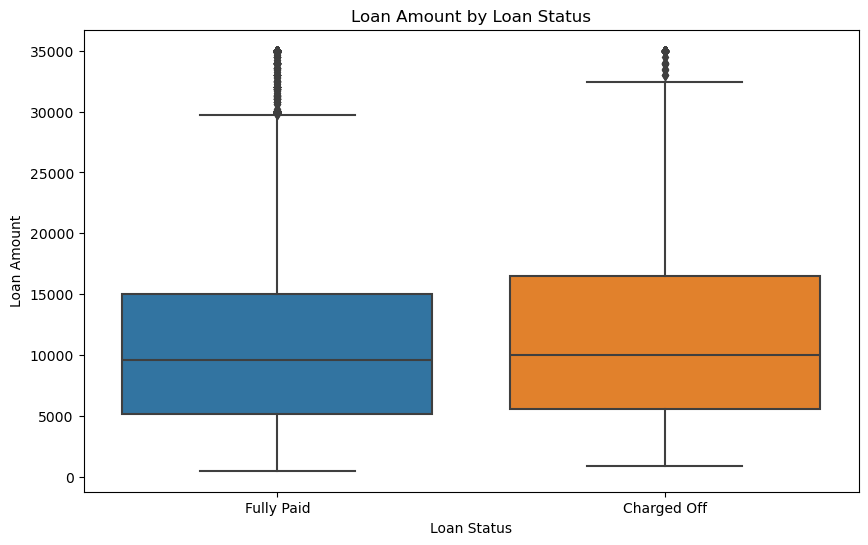

In [59]:
plot_boxplot('loan_amount')

In [60]:
# Observation 1 - Charged off loans have slightly higher loan amounts than fully paid ones

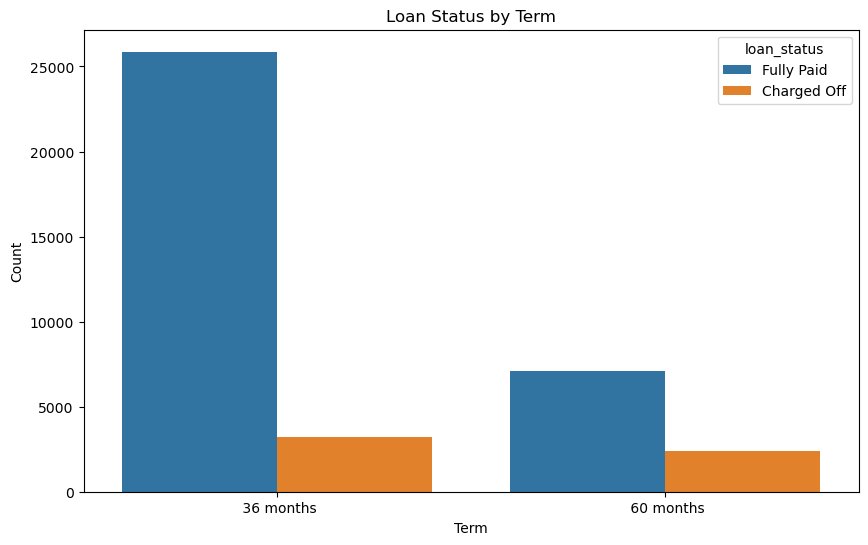

In [61]:
# Since term is categorical, we will do bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='term', hue='loan_status', data=lending_read)
plt.title('Loan Status by Term')
plt.xlabel('Term')
plt.ylabel('Count')
plt.show()

In [62]:
# Observation 2 - Charged-off loans contribute a higher proportion of overall loans in 60 months term compared to 36 months term

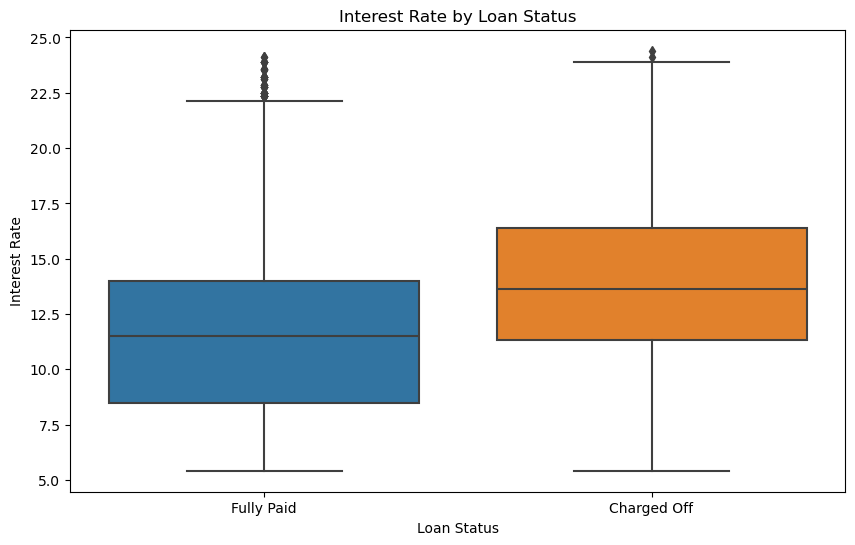

In [63]:
plot_boxplot('interest_rate')

In [64]:
# Observation 3 - Charged off loans is associated with significantly higher interest rate than fully paid ones

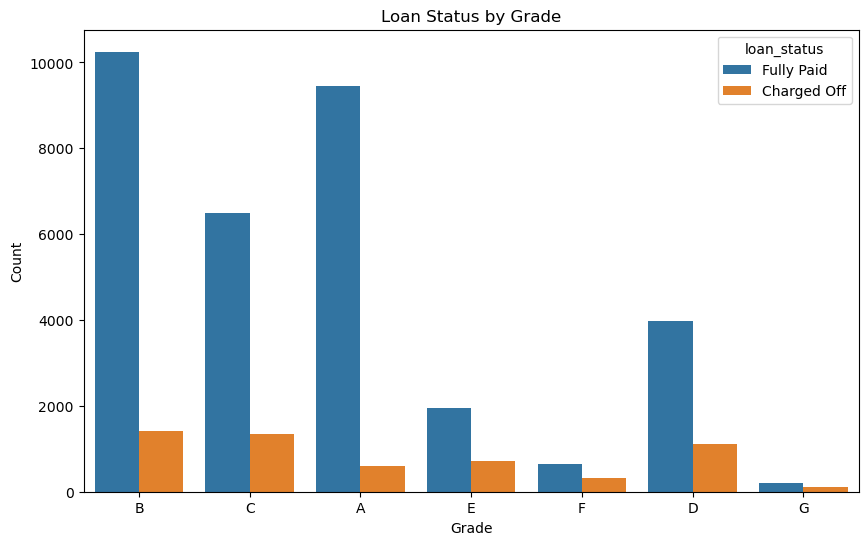

In [65]:
plot_countplot('grade')

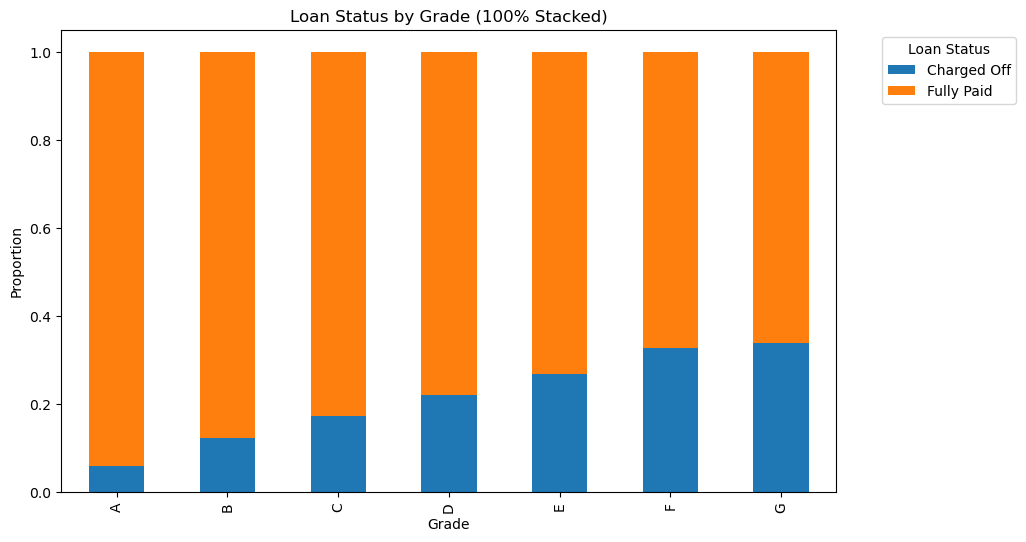

In [66]:
# Initial observation - it looks like grades A->G are decreasing order and lower the grade, higher the proportion of Charged off loans but we have to know for sure. So calculating 100% stacked bars

plot_stacked_bar('grade')

In [67]:
# Observation 4 - Lower grade loans have a higher chance of default

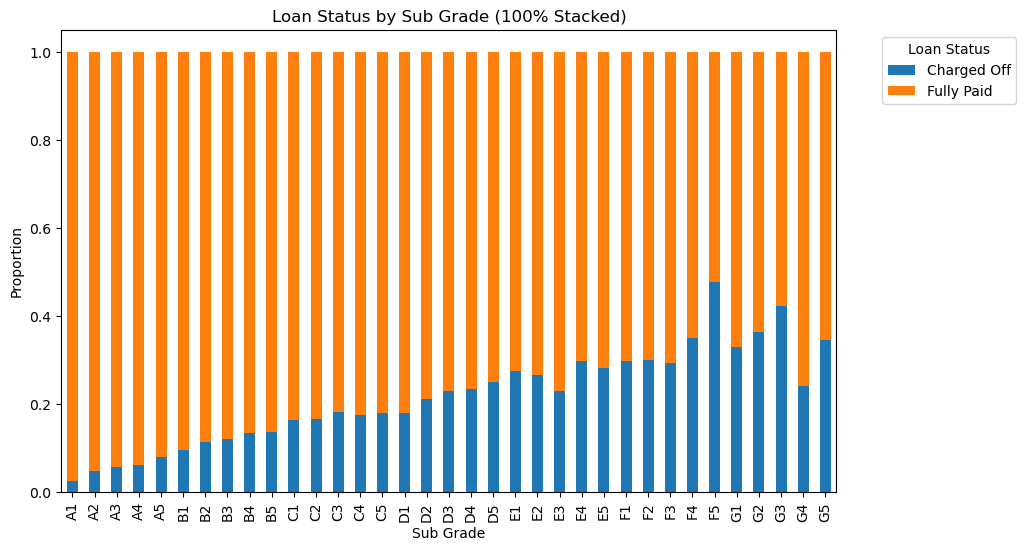

In [68]:
# We can apply teh same to sub grade
plot_stacked_bar('sub_grade')


In [69]:
# Although specific sub grades like F5 and G3 have higher chance of default, this specific plot does not concude anything we do not know from teh previous plot of Grades

In [70]:
# employment_length



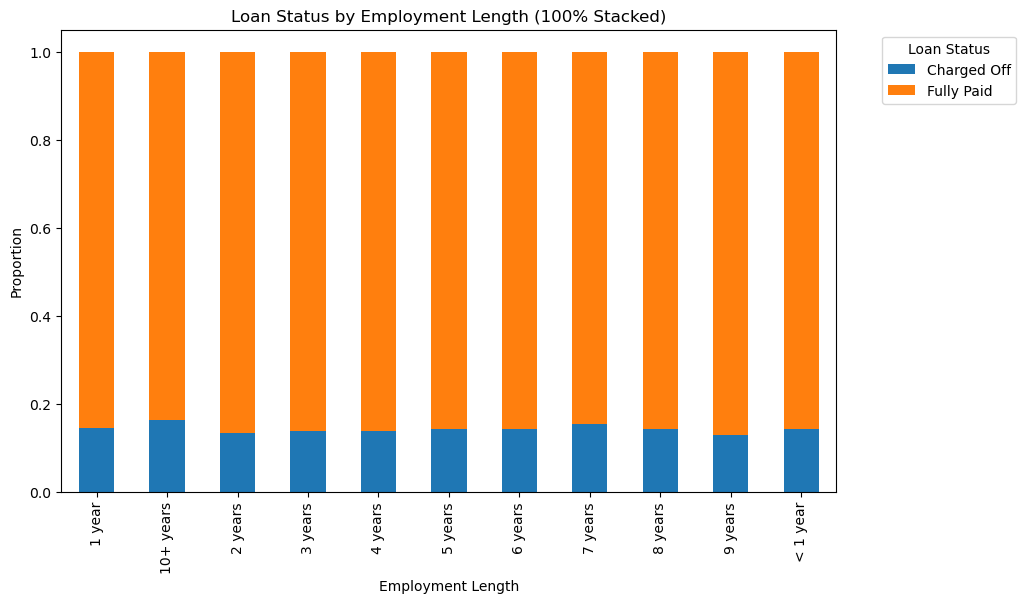

In [71]:
plot_stacked_bar('employment_length')

In [72]:
#It Looks like Employment length does not influence loan defaults

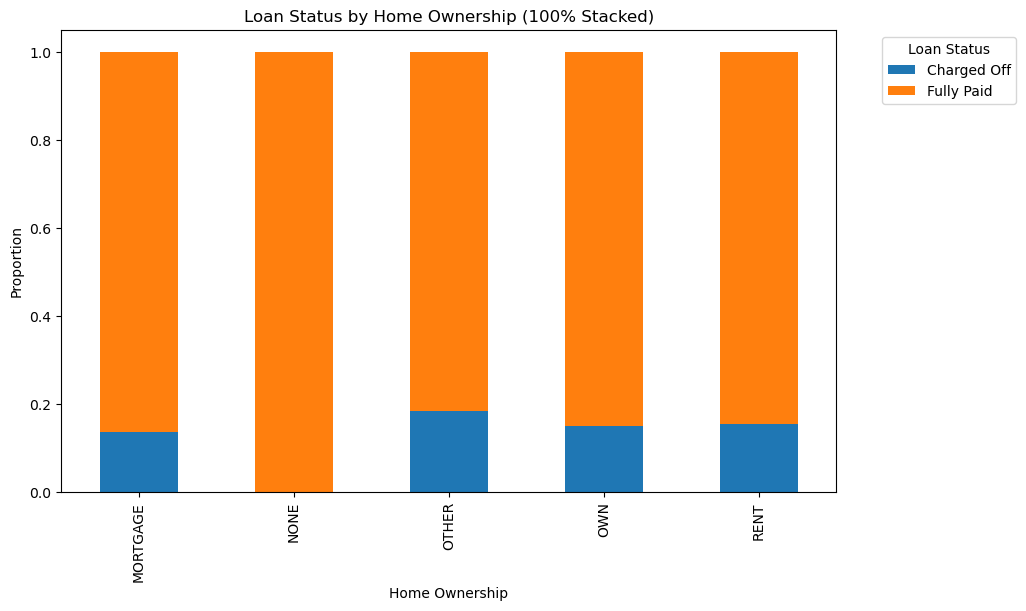

In [73]:
plot_stacked_bar('home_ownership')

In [74]:
# Even home ownership does not seem to influence defaults as charged off is in similar proportions in each category. We can ignore none because this does not convey any home ownership detail

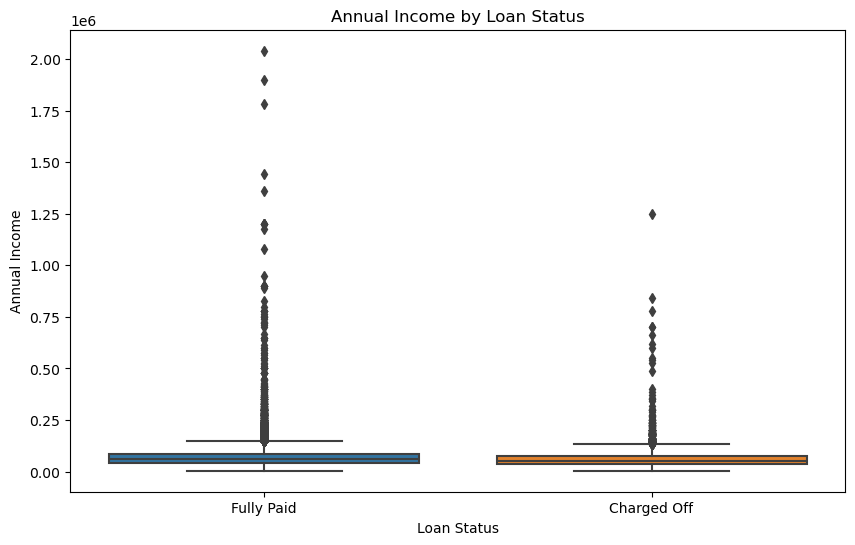

In [75]:
# for annual_income we again do a box plot since it is numeric/continuous
plot_boxplot('annual_income')

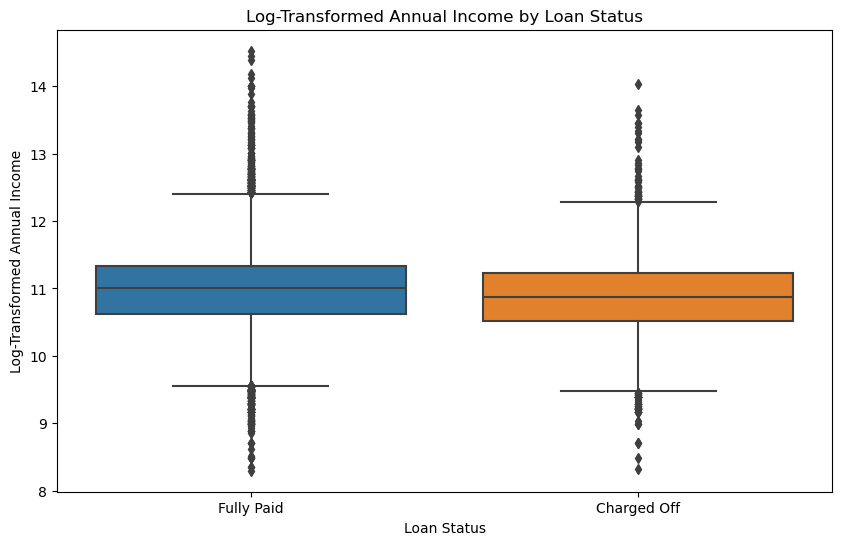

In [76]:
# Since the boxes are looking similar due to the spread of the data, according to standard practices, we do a log transformation (as explained by Anand in EDA) which can improve readability without impacting analysis 
lending_read['log_annual_income'] = lending_read['annual_income'].apply(lambda x: np.log(x + 1))
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='log_annual_income', data=lending_read)
plt.title('Log-Transformed Annual Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Log-Transformed Annual Income')
plt.show()

In [77]:
# Observation 5 - Members who defaulted on loans have on an average slightly lower annual incomes than full ypaid loans

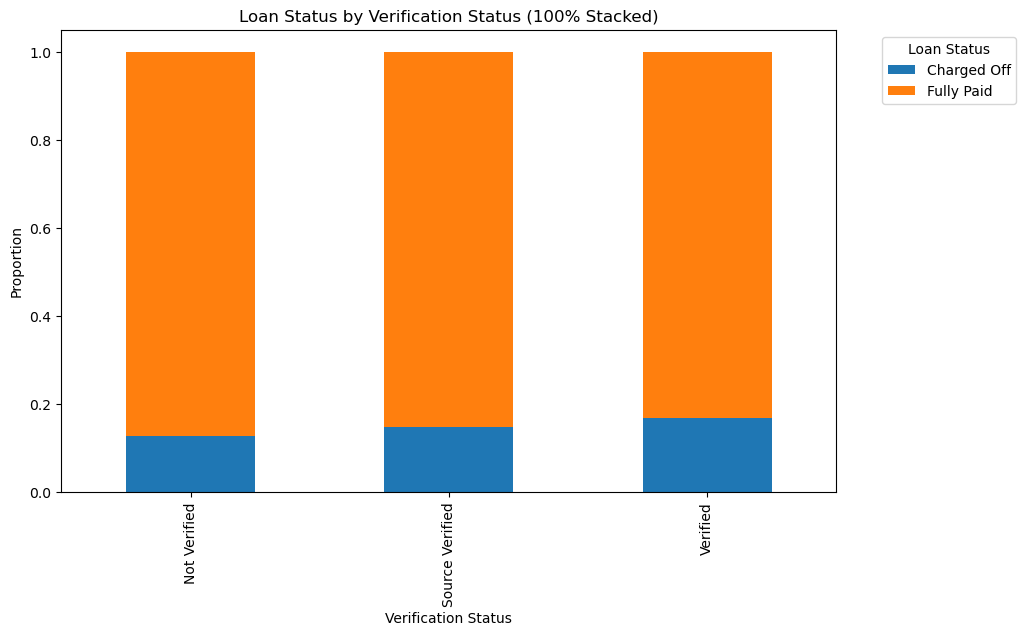

In [78]:
plot_stacked_bar('verification_status')

In [79]:
# Since the proportions of charged off loans are similar, verification status id not a driver of loan default

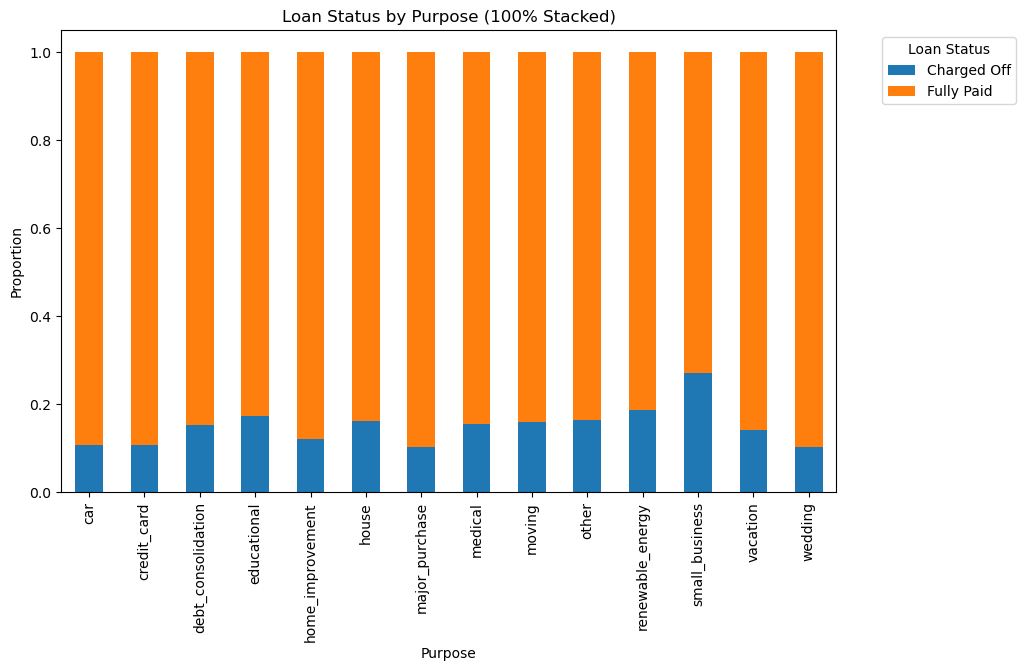

In [80]:
plot_stacked_bar('purpose')

In [81]:
# Observation 6 - Members who have taken loans for small_business have slightly higher chance of default, though not significant enough

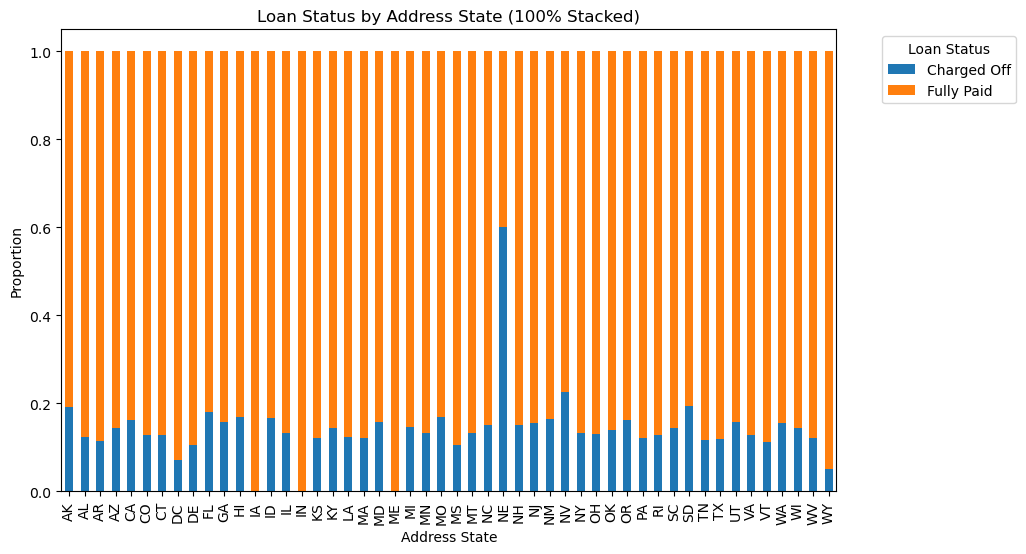

In [82]:
plot_stacked_bar('address_state')

In [83]:
# Observation 7 - Loans given to NE (Nevada?) state residents have a significantly higher chance of default

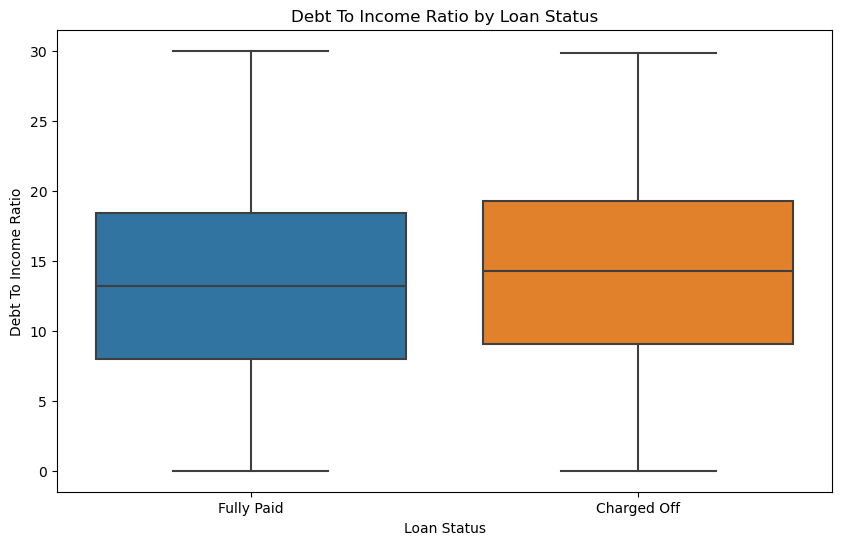

In [84]:
plot_boxplot('debt_to_income_ratio')

In [85]:
# Observation 8 - Members having higher debt-to income ratio have higher chance of defaulting as observed from the box plots mean and 75th percentiles

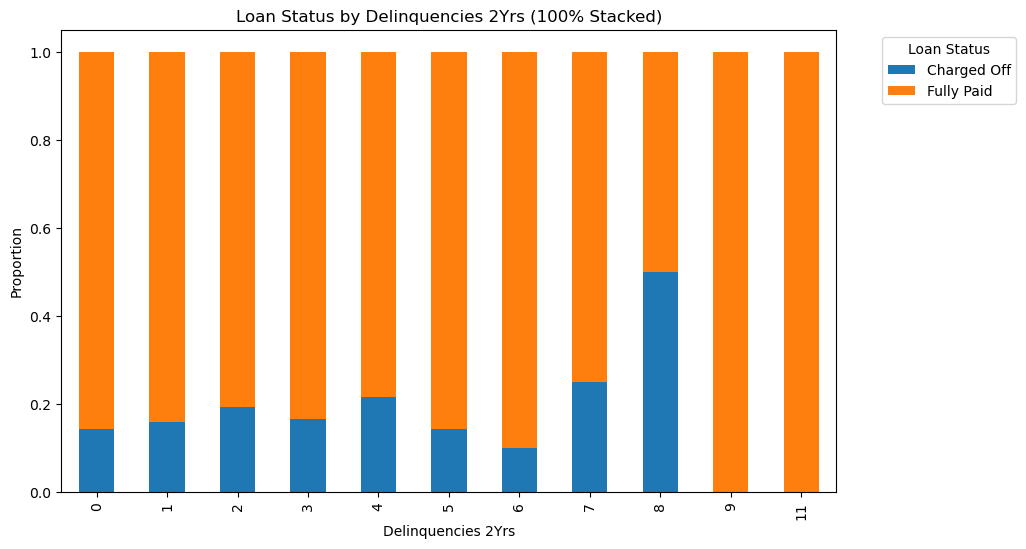

In [86]:
plot_stacked_bar('delinquencies_2yrs')

In [87]:
# Observation - We consider delinquencies as Ordered categorical. So in this case though 8 delinquencies represent nigh default rate , same is not the case for 9 and 11 so we cannot conclude anything here

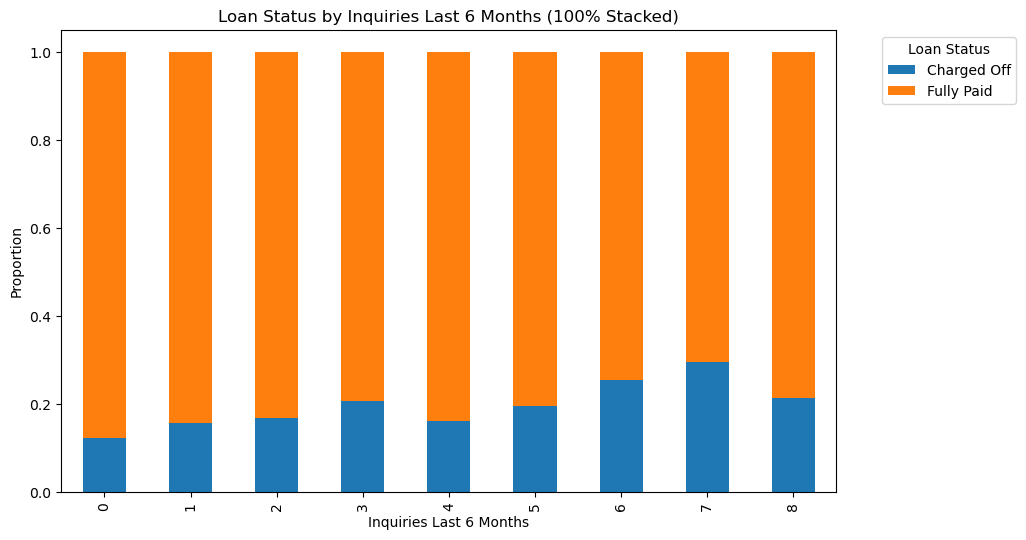

In [88]:
plot_stacked_bar('inquiries_last_6_months')

In [89]:
# Even inquiries (considering as ordered categorical since there are minimum set of values, although integer) do not conclude anything

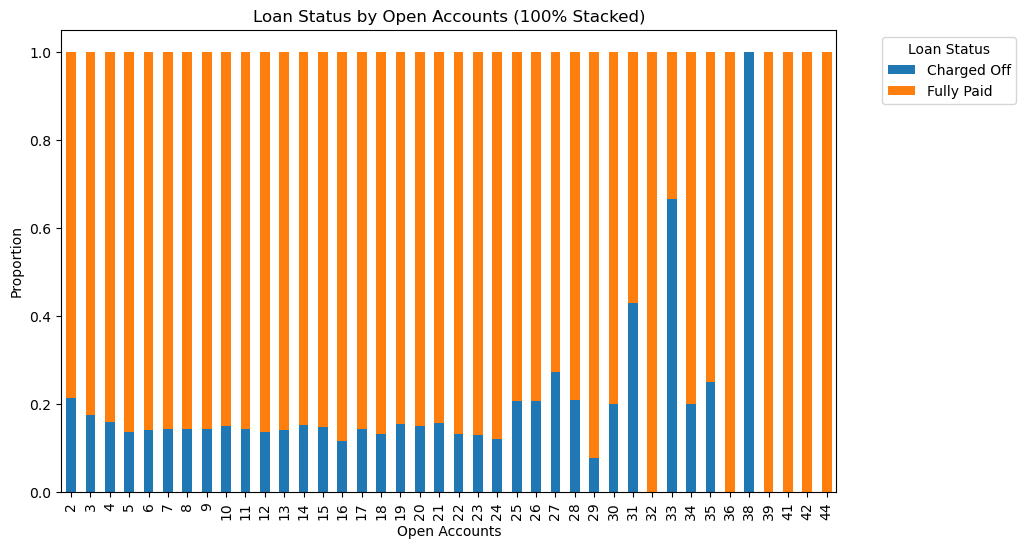

In [90]:
plot_stacked_bar('open_accounts')

In [91]:
# Although the higher proportion of defaults is to the higher end of open accounts,, lack of defaults in 32,36 and 39-44 does not give enough confidence to conclude that

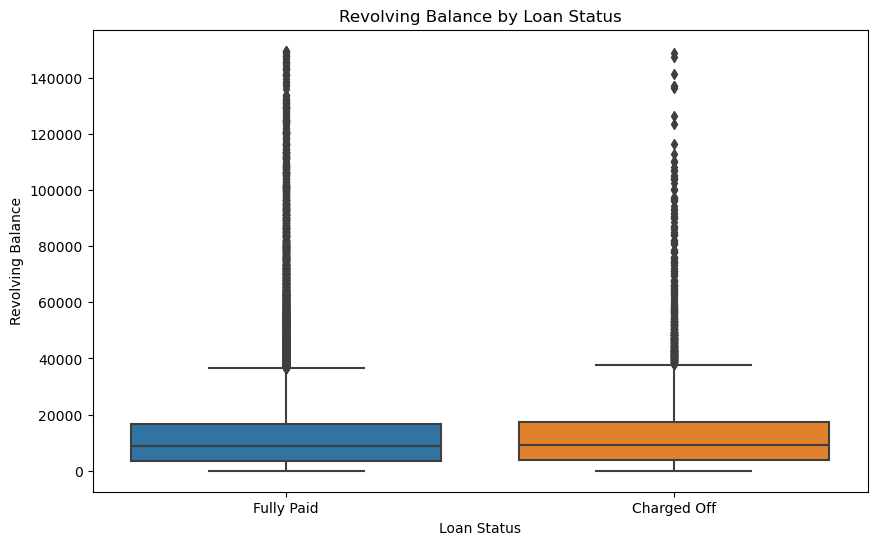

In [92]:
plot_boxplot('revolving_balance')

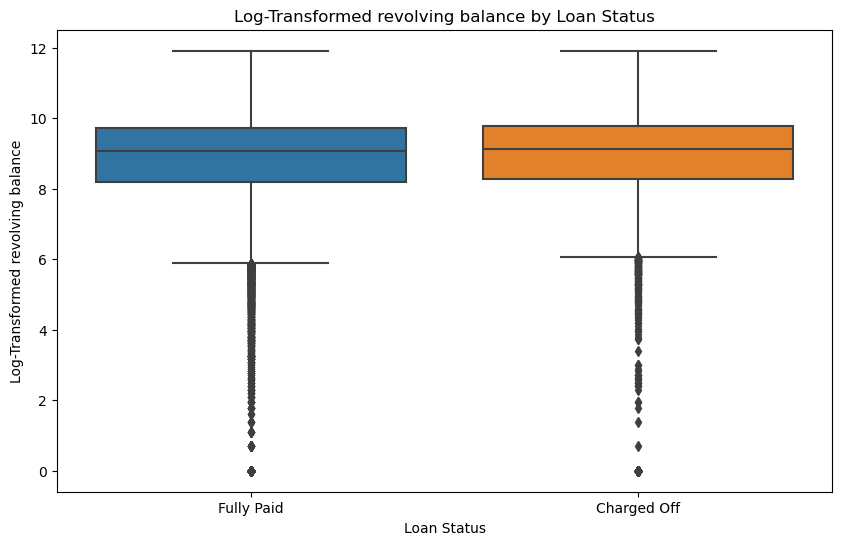

In [93]:
# Since the boxes are small, we do log scale again
lending_read['log_revolving_balance'] = lending_read['revolving_balance'].apply(lambda x: np.log(x + 1))
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='log_revolving_balance', data=lending_read)
plt.title('Log-Transformed revolving balance by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Log-Transformed revolving balance')
plt.show()

In [94]:
# Still there is no conclusive difference in means or quartiles so no observation for this variable

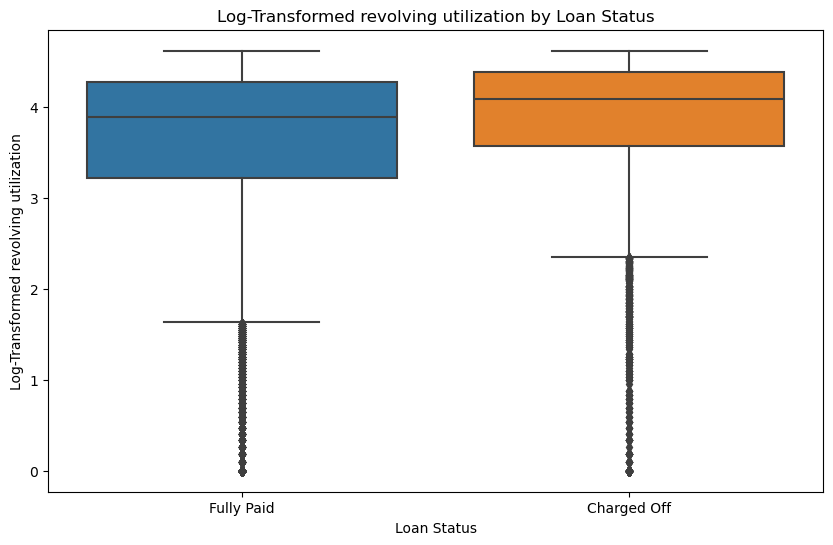

In [95]:

lending_read['log_revolving_utilization'] = lending_read['revolving_utilization'].apply(lambda x: np.log(x + 1))
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='log_revolving_utilization', data=lending_read)
plt.title('Log-Transformed revolving utilization by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Log-Transformed revolving utilization')
plt.show()

In [96]:
# Observation 9 - Higher revolving utilization correlates with a higher charged off loans

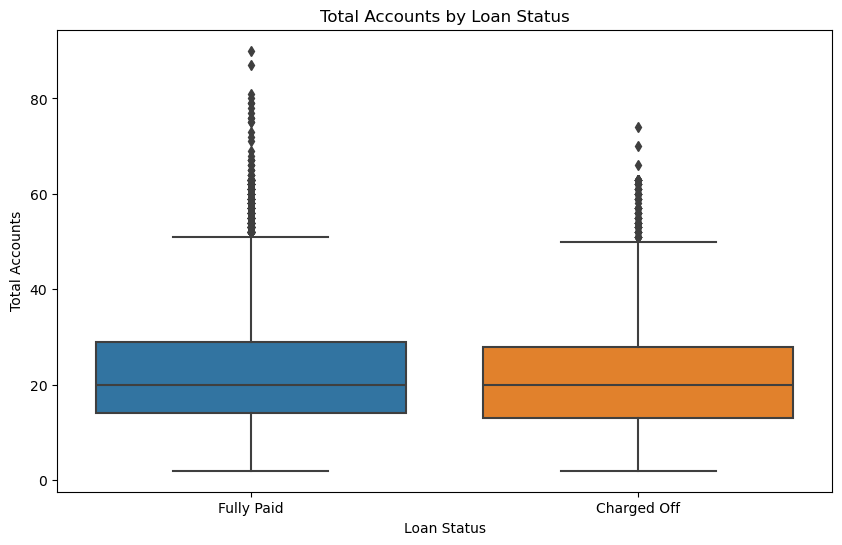

In [97]:
plot_boxplot('total_accounts')

In [98]:
# Observation 10 - lower the total number of credit lines currently in the borrower's credit file,  more chances of charged off loans. This is counter-intuitive

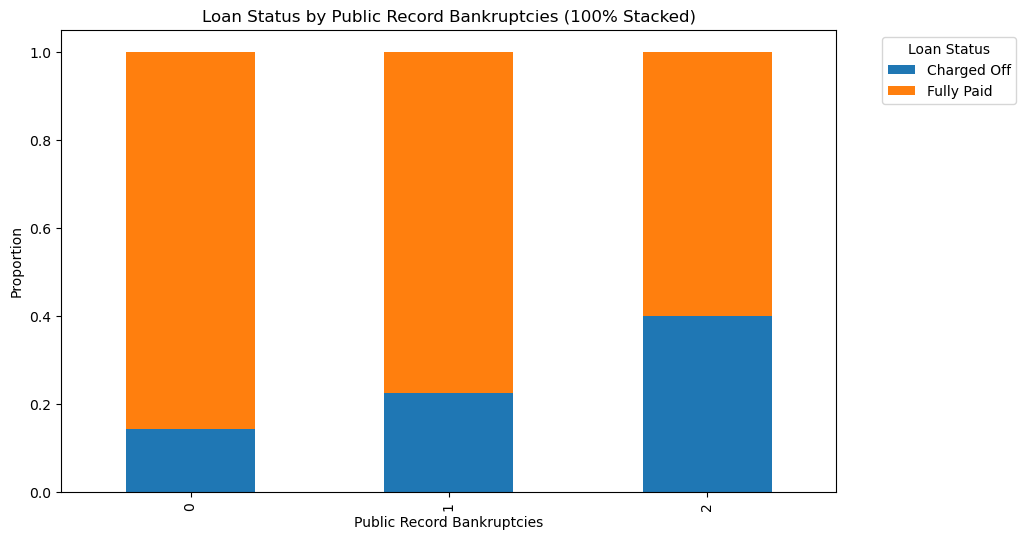

In [99]:
plot_stacked_bar('public_record_bankruptcies')

In [100]:
## Observation 11 - the more a member has a public record of bankrupcies, more probability of the loan default

In [106]:
# Validate the observations with correlation calculations

# Convert 'loan_status' to a numerical value for correlation calculation
lending_read['loan_status'] = lending_read['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)

# Convert 'term' to numerical values
lending_read['term'] = lending_read['term'].apply(lambda x: int(x.strip().split()[0]))

# Convert 'grade' to numerical values
grade_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
lending_read['grade'] = lending_read['grade'].map(grade_mapping)

# Convert 'sub_grade' to numerical values
sub_grade_mapping = {f'{g}{i}': grade_mapping[g] * 5 + i for g in grade_mapping for i in range(1, 6)}
lending_read['sub_grade'] = lending_read['sub_grade'].map(sub_grade_mapping)

# Convert 'employment_length' to numerical values
employment_length_mapping = {'< 1 year': 0.5, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, 
                             '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9,
                             '10+ years': 10}
lending_read['employment_length'] = lending_read['employment_length'].map(employment_length_mapping)

# Convert 'home_ownership' to numerical values
home_ownership_mapping = {'RENT': 1, 'OWN': 2, 'MORTGAGE': 3, 'OTHER': 4}
lending_read['home_ownership'] = lending_read['home_ownership'].map(home_ownership_mapping)

# Convert 'verification_status' to numerical values
verification_status_mapping = {'Not Verified': 0, 'Source Verified': 1, 'Verified': 2}
lending_read['verification_status'] = lending_read['verification_status'].map(verification_status_mapping)

# Convert 'purpose' to numerical values
purpose_mapping = {purpose: idx for idx, purpose in enumerate(lending_read['purpose'].unique())}
lending_read['purpose'] = lending_read['purpose'].map(purpose_mapping)

# Convert 'address_state' to numerical values
address_state_mapping = {state: idx for idx, state in enumerate(lending_read['address_state'].unique())}
lending_read['address_state'] = lending_read['address_state'].map(address_state_mapping)

# Calculate the correlation of all variables with 'loan_status'
correlation_with_loan_status = lending_read.corr()['loan_status']

# Print the correlation values
print(correlation_with_loan_status)


member_id                        -0.039784
loan_amount                      -0.059478
term                             -0.173508
interest_rate                    -0.211390
grade                            -0.201870
sub_grade                        -0.205317
employment_length                -0.023721
home_ownership                    0.022204
annual_income                     0.047355
verification_status              -0.048254
loan_status                       1.000000
purpose                          -0.010402
address_state                     0.010881
debt_to_income_ratio             -0.045040
delinquencies_2yrs               -0.020090
inquiries_last_6_months          -0.071904
open_accounts                     0.009152
revolving_balance                -0.005839
revolving_utilization            -0.099845
total_accounts                    0.022610
outstanding_principal                  NaN
outstanding_principal_investor         NaN
public_record_bankruptcies       -0.046985
log_annual_

In [ ]:
# Although the correlations with loan_status for none of the variables is high (>0.7), these values validate some of the observations made

                               Data Type  Null Values  Unique Values
member_id                          int32            0          38575
loan_amount                        int32            0            870
term                              object            0              2
interest_rate                    float64            0            370
grade                             object            0              7
sub_grade                         object            0             35
employment_length                 object            0             11
home_ownership                    object            0              5
annual_income                      int32            0           5175
verification_status               object            0              3
loan_status                       object            0              2
purpose                           object            0             14
address_state                     object            0             50
debt_to_income_ratio             f